In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def neville_interpolation(x_points, y_points, x):
    """Neville's Iterated Interpolation Formula."""
    n = len(x_points)
    P = np.zeros((n, n))
    
    # Initialize the diagonal with y-values
    for i in range(n):
        P[i, 0] = y_points[i]
    
    # Apply Neville's formula iteratively
    for j in range(1, n):
        for i in range(n - j):
            P[i, j] = ((x - x_points[i]) * P[i+1, j-1] - (x - x_points[i+j]) * P[i, j-1]) / (x_points[i+j] - x_points[i])
    
    return P[0, n-1]  # The final result is the top right value

def interpolate_image(image, step=1):
    """Use Neville's method to interpolate an image's pixel grid."""
    height, width = image.shape
    new_image = np.zeros_like(image, dtype=float)
    
    # Interpolate rows (each row is a series of x_points)
    for i in range(height):
        row = image[i, :]
        for j in range(width):
            new_image[i, j] = neville_interpolation(np.arange(0, width, step), row[::step], j)
    
    # Interpolate columns (each column is a series of y_points)
    for j in range(width):
        col = image[:, j]
        for i in range(height):
            new_image[i, j] = neville_interpolation(np.arange(0, height, step), col[::step], i)
    
    return new_image

# Load an image (grayscale for simplicity)
image_path = "anarchy.png"  # Replace with your image path
image = Image.open(image_path).convert("L")  # Convert to grayscale
image_data = np.array(image)

# Interpolate the image (using a step to skip some points for simplicity)
interpolated_image = interpolate_image(image_data, step=2)

# Plot the original and interpolated image for comparison
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap="gray")
plt.title("Original Image")
plt.axis('off')

# Interpolated image
plt.subplot(1, 2, 2)
plt.imshow(interpolated_image, cmap="gray")
plt.title("Interpolated Image (Neville's Method)")
plt.axis('off')

plt.show()


KeyboardInterrupt: 

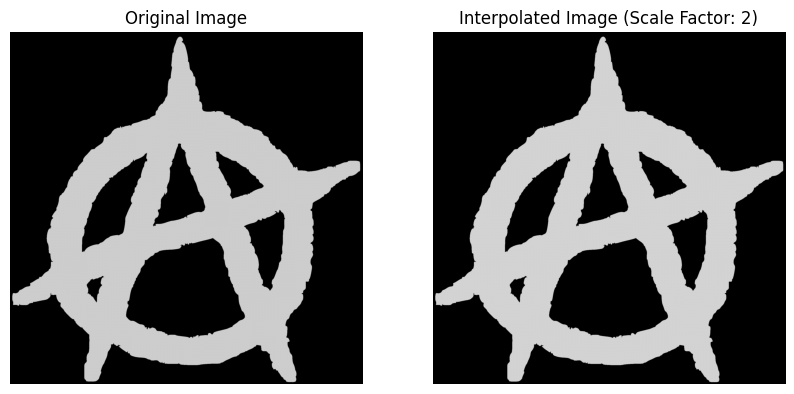

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import zoom  # For faster interpolation

def load_and_convert_to_grayscale(image_path):
    """Load an image and convert it to grayscale."""
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    return np.array(image)

def bilinear_interpolation(image, scale_factor):
    """
    Resize an image using bilinear interpolation.
    This function uses scipy's zoom for simplicity and speed.
    """
    return zoom(image, scale_factor, order=1)  # 'order=1' indicates bilinear interpolation

# Load and process the image
image_path = "anarchy.png"  # Replace with your image path
image_data = load_and_convert_to_grayscale(image_path)

# Scale the image (e.g., scale factor of 2 for doubling the size)
scale_factor = 2
interpolated_image = bilinear_interpolation(image_data, scale_factor)

# Plot the original and interpolated images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_data, cmap="gray")
plt.title("Original Image")
plt.axis('off')

# Interpolated image
plt.subplot(1, 2, 2)
plt.imshow(interpolated_image, cmap="gray")
plt.title(f"Interpolated Image (Scale Factor: {scale_factor})")
plt.axis('off')

plt.show()
